In [19]:
from bertopic import BERTopic
import json
import pandas as pd

In [2]:
with open("data/vol7.json", "r", encoding="utf-8") as f:
    docs = json.load(f)["descriptions"]
len(docs)

21747

In [3]:
topic_model = BERTopic(embedding_model="all-MiniLM-L6-v2")

In [4]:
topics, probs = topic_model.fit_transform(docs)

# Get some Info on our Topics as a DataFrame

In [8]:
topic_model.get_topic_info()

Topic  Count                                         Name
0       -1   5694                        -1_shot_anc_was_natal
1        0    920          0_detained_tortured_arrested_months
2        1    364         1_udf_detained_regulations_emergency
3        2    329                   2_stabbed_death_1991_natal
4        3    254  3_bophuthatswana_taung_zeerust_leeuwfontein
..     ...    ...                                          ...
409    408     11       408_facilitated_175_structures_command
410    409     11           409_sonkombo_ndwedwe_attacks_arson
411    410     10        410_kwahaza_mahlabatini_ulundi_howick
412    411     10   411_mcilongo_mzwini_mooiplaas_associations
413    412     10               412_peace_amabutho_inkatha_udf

[414 rows x 3 columns]

# Get the Keywords for a Topic

In [9]:
topic_model.get_topic(topic=0)

[('detained', 0.010849141867382174),
 ('tortured', 0.009475943525300557),
 ('arrested', 0.007900894745459224),
 ('months', 0.00709964466115853),
 ('detention', 0.0070221762222150985),
 ('emergency', 0.006870285482314344),
 ('beaten', 0.006699740388056902),
 ('under', 0.006033096167408209),
 ('sap', 0.0057955719985676715),
 ('1986', 0.005415125819014569)]

In [15]:
topic_model.get_representative_docs(0)

['A BCM member who was arrested in connection with the killing of a suspected collaborator in Port Elizabeth on 20 September 1977. While in detention, he was assaulted by members of the SAP.',
 'A SASM member who was arrested and detained by members of the SAP in Mhluzi, Middelburg, Tvl, in October 1976 in the wake of the Soweto uprsing.',
 'Was detained, beaten and charged with public violence in Zolani, Ashton, Cape, in November 1985. He was later convicted.']

In [21]:
df = pd.DataFrame({'topic': topics, 'document': docs})
df.loc[df["topic"] == 33]

topic                                           document
1         33  A member of the SADF who was severely injured ...
60        33  Was shot through the head and killed on 15 Nov...
171       33  Was killed by SADF members in Temba, Bophuthat...
558       33  Was shot and injured by a member of the SADF i...
2375      33  Was shot and injured by members of the SADF in...
...      ...                                                ...
20222     33  Was shot in the back, allegedly by members of ...
20487     33  Was shot dead by members of the SADF on 17 Jun...
20738     33  Was shot and injured when members of the SADF ...
20772     33  Was shot by members of the SADF in Toekomsrus,...
21164     33  Was shot dead by members of the SADF at the So...

[88 rows x 2 columns]

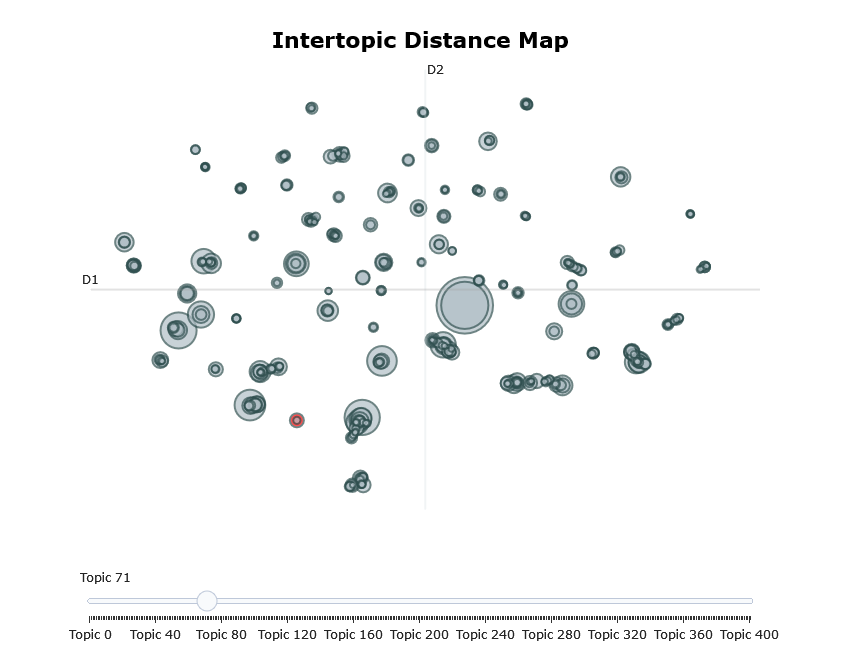

In [12]:
topic_model.visualize_topics()

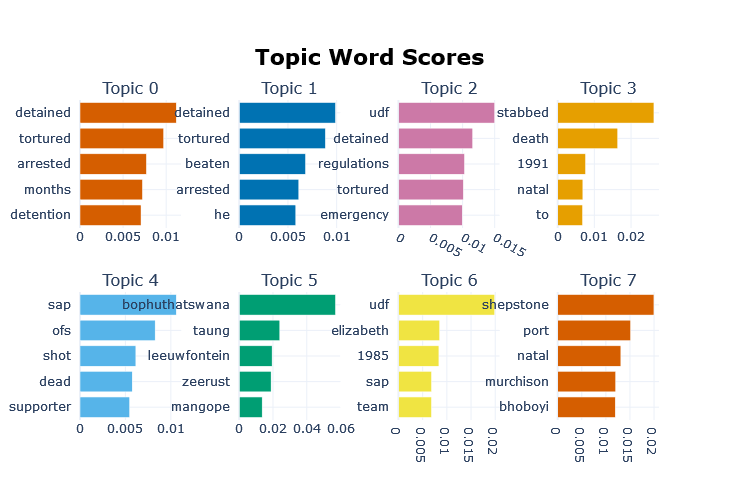

In [13]:
topic_model.visualize_barchart()

In [15]:
hierarchical_topics = topic_model.hierarchical_topics(docs, topics)

100%|███████████████████████████████████████████████████████████████████████████████| 401/401 [00:02<00:00, 189.32it/s]


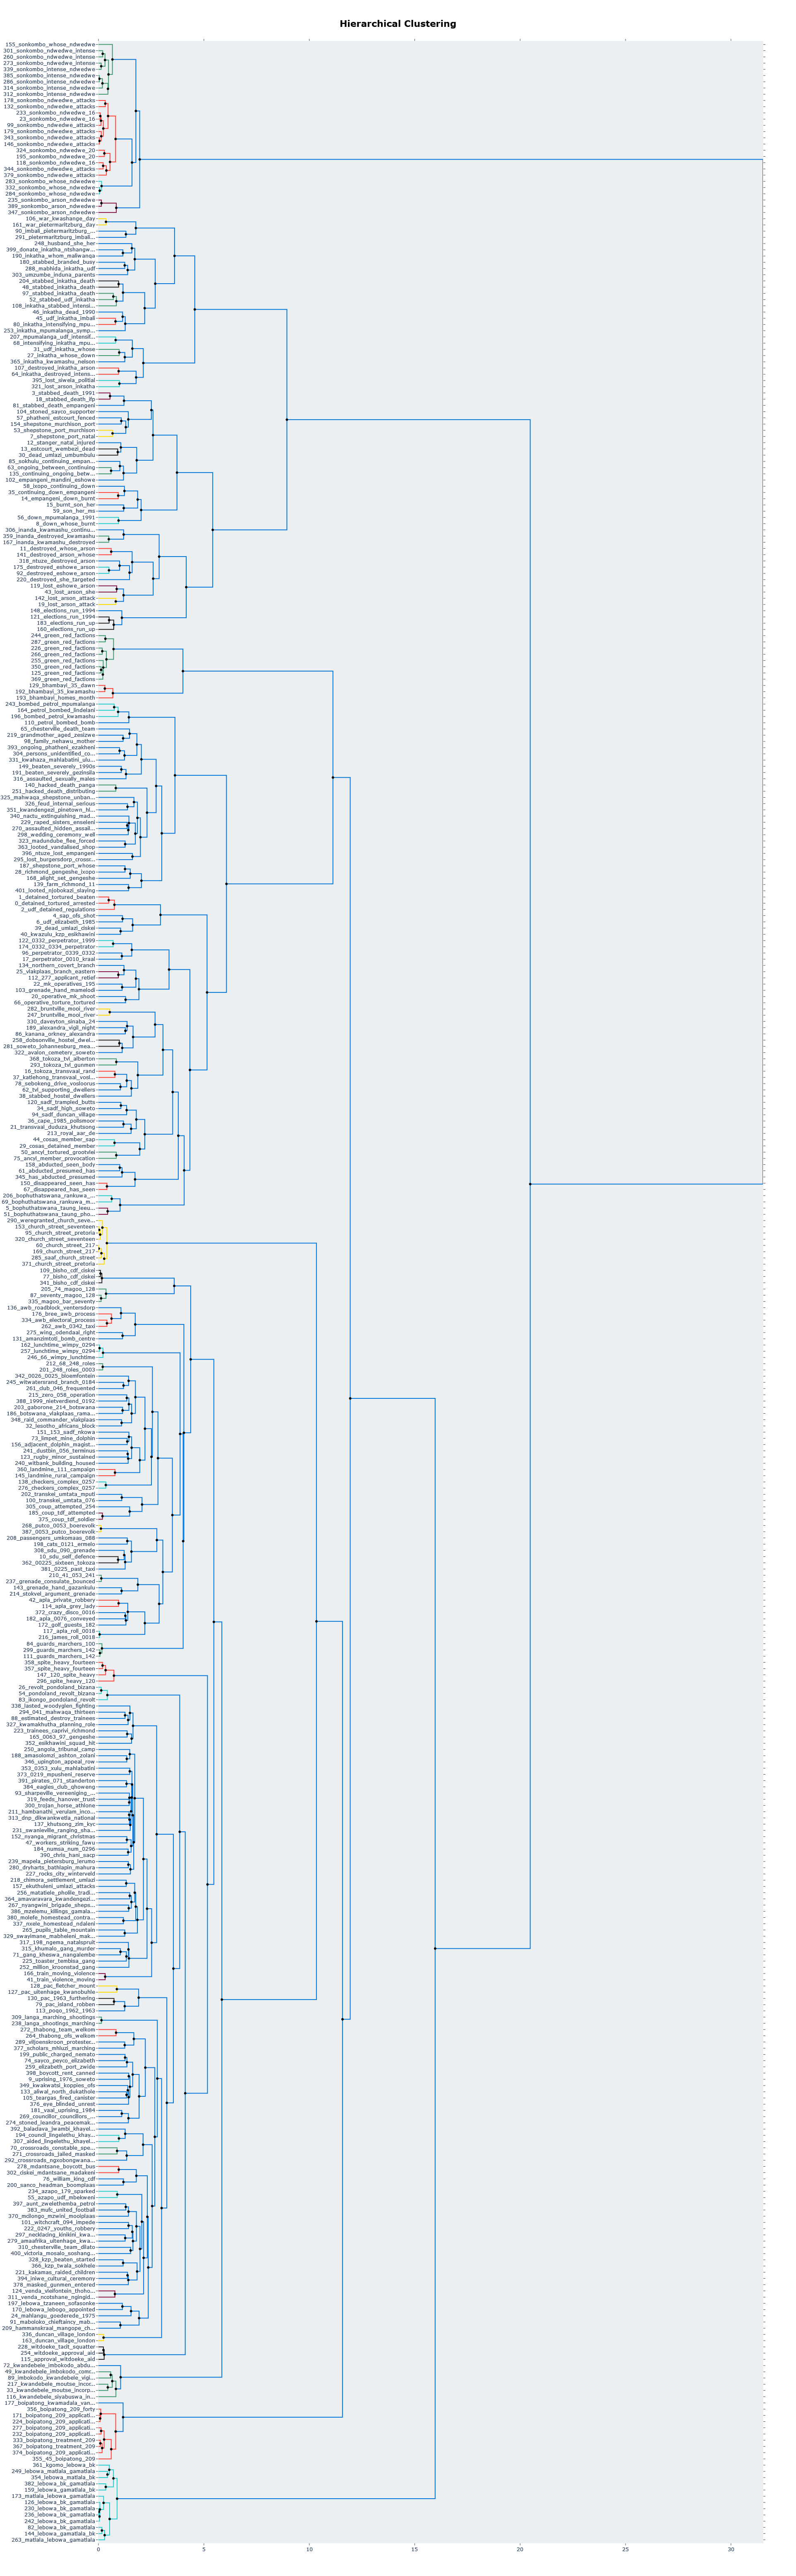

In [16]:
topic_model.visualize_hierarchy(hierarchical_topics=hierarchical_topics)